In [1]:
import pandas as pd
import numpy as np

In [74]:
# Import Files into DataFrame
df = pd.read_csv("C:/Users/pjpra/OneDrive/Desktop/My_Learnings/Python/Task5/takehome_users.csv",encoding = "ISO-8859-1")
df2 = pd.read_csv("takehome_user_engagement.csv")

In [77]:
# User Engagement Data Frame
df2.describe()
df2.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [78]:
# TakeHome User Data Frame
df.describe()
df.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,22-04-2014 03:53,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,15-11-2013 03:45,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,19-03-2013 23:14,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,21-05-2013 08:09,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,17-01-2013 10:14,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [81]:
# DF2 Convert Time stamp to date time
df['last_session_creation_time'] = pd.to_datetime(df['last_session_creation_time'],unit='ms')

In [80]:
# Group user by creation source
df.groupby('creation_source')['object_id'].count()

creation_source
GUEST_INVITE          2163
ORG_INVITE            4254
PERSONAL_PROJECTS     2111
SIGNUP                2087
SIGNUP_GOOGLE_AUTH    1385
Name: object_id, dtype: int64

In [82]:
"""#convert to datetimes
df2['time_stamp'] = pd.to_datetime(df2['time_stamp'])

#7 days timedelta
t = pd.Timedelta(7, unit='d')

f = lambda x: x.apply(lambda y: (x.between(y - t, y).sum()))
df2['new'] = df2.groupby('user_id')['time_stamp'].apply(f)
print (df2)"""

#convert to datetimes
df2['time_stamp'] = pd.to_datetime(df2['time_stamp'])

# Find Difference in the user_login
df2['diff'] = df2.sort_values(['user_id','time_stamp']).groupby('user_id')['time_stamp'].diff()

# Drop users with no difference in login days
df3 = df2.dropna(subset=['diff'])
print (df3)

                time_stamp  user_id  visited    diff
2      2013-11-29 03:45:04        2        1 14 days
3      2013-12-09 03:45:04        2        1 10 days
4      2013-12-25 03:45:04        2        1 16 days
5      2013-12-31 03:45:04        2        1  6 days
6      2014-01-08 03:45:04        2        1  8 days
...                    ...      ...      ...     ...
207902 2014-06-01 11:04:47    11988        1  5 days
207906 2014-04-25 14:22:45    11991        1  5 days
207907 2014-04-28 14:22:45    11991        1  3 days
207908 2014-05-17 14:22:45    11991        1 19 days
207909 2014-05-30 14:22:45    11991        1 13 days

[199094 rows x 4 columns]


In [83]:
# Get days from the diff and drop diff
df3['Days']= df3['diff'].astype('timedelta64[D]')
df3.drop('diff',axis=1,inplace=True)
df3.dtypes

C:\Users\pjpra\AppData\Local\Temp\ipykernel_19640\809627670.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Days']= df3['diff'].astype('timedelta64[D]')
C:\Users\pjpra\AppData\Local\Temp\ipykernel_19640\809627670.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3.drop('diff',axis=1,inplace=True)


time_stamp    datetime64[ns]
user_id                int64
visited                int64
Days                 float64
dtype: object

In [84]:
# Filter out the max users
dfd3 = df3[df3['Days'] < 7]
dfd4 = dfd3.groupby('user_id')['visited','Days'].sum()
dfd4['avg'] = dfd4.Days / dfd4.visited
dfd4.head()
dfd5 = dfd4[dfd4['avg'] < 7]

C:\Users\pjpra\AppData\Local\Temp\ipykernel_19640\2987313970.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  dfd4 = dfd3.groupby('user_id')['visited','Days'].sum()


In [138]:
#merge frequent users with master list
dfm = pd.merge(df,dfd4,left_on='object_id', right_on='user_id')
dfm.isnull().sum()
dfm.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,visited,Days,avg
0,2,15-11-2013 03:45,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1970-01-17 03:50:37.504,0,0,1,316.0,6,23.0,3.833333
1,10,16-01-2013 22:08,Santos Carla,CarlaFerreiraSantos@gustr.com,ORG_INVITE,1970-01-17 05:23:53.283,1,1,318,4143.0,279,468.0,1.677419
2,19,24-05-2013 14:56,Collins Arlene,ArleneRCollins@gmail.com,SIGNUP,1970-01-16 20:32:05.796,1,0,0,NaN,1,5.0,5.000000
3,20,06-03-2014 11:46,Helms Mikayla,lqyvjilf@uhzdq.com,SIGNUP,1970-01-17 05:16:03.998,0,0,58,NaN,4,7.0,1.750000
4,25,25-02-2014 00:11,Stone Elise,EliseStone@jourrapide.com,GUEST_INVITE,1970-01-17 03:02:53.473,1,0,81,6312.0,1,1.0,1.000000


In [127]:
# Group user by creation source
gpr = dfm.groupby('creation_source')['object_id'].count()
# It is evident that only users 

creation_source
GUEST_INVITE          493
ORG_INVITE            762
PERSONAL_PROJECTS     225
SIGNUP                407
SIGNUP_GOOGLE_AUTH    297
Name: object_id, dtype: int64

In [91]:
# Count Users based on subscription to Marketing and Mailing
# enabled for marketing drip
j,k=0,0
for i in dfm["enabled_for_marketing_drip"]:
    if i == 0:
        j += 1
    else:
        k += 1
print("Enabled for marketing drip:\nNot Enabled:",j,"\nEnabled for:",k)

# Opted in mailing list
j,k=0,0
for i in dfm["opted_in_to_mailing_list"]:
    if i == 0:
        j += 1
    else:
        k += 1
print("Opted in mailing list:\nNot Opted:",j,"\nOpted for:",k)

Enabled for marketing drip:
Not Enabled: 1833 
Enabled for: 351
Opted in mailing list:
Not Opted: 1607 
Opted for: 577


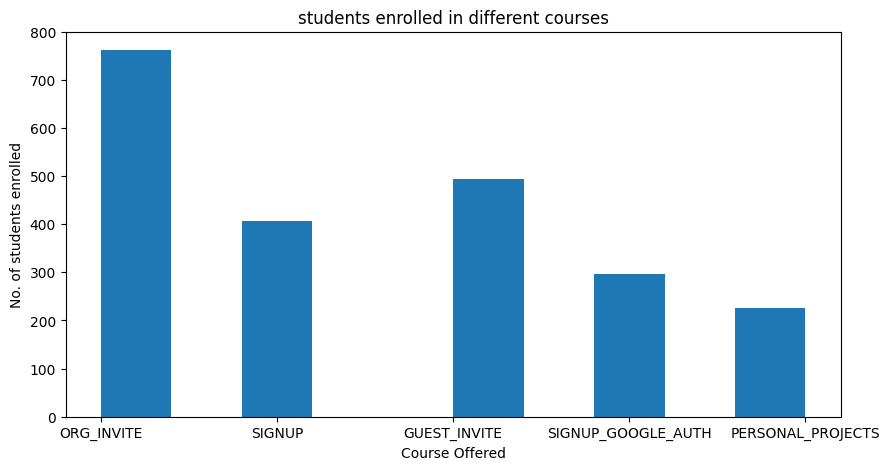

In [143]:
# Plot the frequent users category

import matplotlib.pyplot as plt
# setting the figure size
plt.figure(figsize = (10, 5))

# Bar Plot
plt.hist(dfm.creation_source)
plt.xlabel('Course Offered')
plt.ylabel('No. of students enrolled')
plt.title('students enrolled in different courses')
plt.show()